# Carbonate Species versus pH

In [1]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [2]:
% database 
database=['phreeqc.dat'];

In [36]:
% Define PHREEQC database
database = 'phreeqc.dat';
% Define minerals to consider
minerals = [{'CO2(g)'}]; % Open system with CO2 gas
totalvector=[1e-3];
totalnames=[C(4)];
% Define pH range
pHrange = 2:0.1:14;  
% Define total concentrations of species
totalnames = [{'H+'}; {'Alkalinity'}]; % Corrected species names
% Set temperature 
T = 25;  
show=0; % this should show the PHREEQC output to the screen. works in Matlab but not Octave

% Define species to track
speciesexport = [{'CO3-2'}; {'HCO3-'};{'H2CO3'}]; % pH-dependent species

% Acid addition (not used in this case)
acid = [];  
% Define initial conditions for pH and pe
pH = 7;  
pe = 20.75 - pH;  
% pH variation setting (1 = fixed, 0 = free)
pHfixcheck = 0;  
    
% Initialize arrays to store species concentrations
alphaH2CO3 = zeros(size(pHrange));
alphaHCO3 = zeros(size(pHrange));
alphaCO3 = zeros(size(pHrange));


Execution exception: 'C' undefined near line 1, column 13

In [32]:
for i = 1:length(pHrange)
    pH = pHrange(i);  
    pe = 20.75 - pH;  
    totalvector=[]; 
% Run PHREEQC simulation in MATLAB
    [solutionspeciesconcs, speciesnames, solidconcs, solidnames] = ...
    runPHREEQCv3(T, pH, pe, totalnames, [], minerals, speciesexport, database, show, acid, pHfixcheck);

% Extract species concentrations
    H2CO3 = solutionspeciesconcs(4);
    HCO3 = solutionspeciesconcs(3);
    CO3 = solutionspeciesconcs(2);
    H = solutionspeciesconcs(1);
end

Execution exception: totalvector(1): out of bound 0 (dimensions are 0x0)

Execution exception: 'pH_range' undefined near line 1, column 6

Execution exception: 'pH_range' undefined near line 1, column 6

Execution exception: 'pH_range' undefined near line 1, column 6

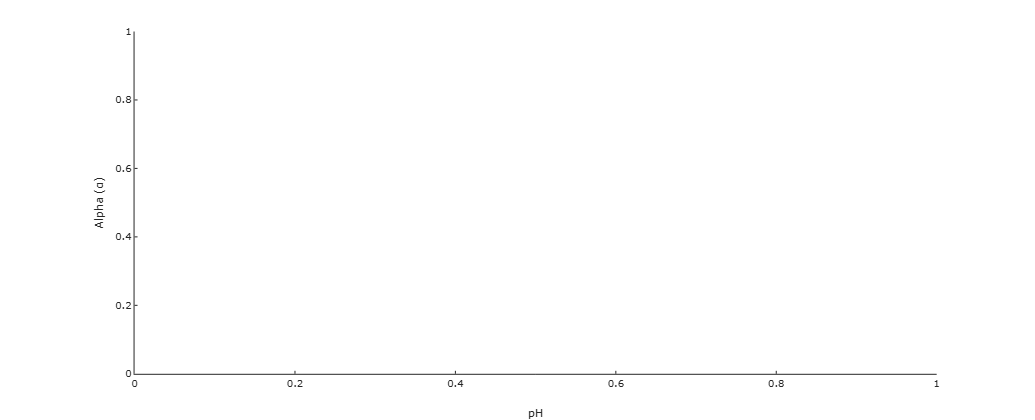

Execution exception: legend: no valid object to label

In [37]:
plot(pH_range, alphaH2CO3, 'r', 'LineWidth', 2); hold on;
plot(pH_range, alphaHCO3, 'g', 'LineWidth', 2);
plot(pH_range, alphaCO3, 'b', 'LineWidth', 2);
xlabel('pH');
ylabel('Alpha (\alpha)');
legend('H2CO3', 'HCO3-', 'CO3-2', 'Location', 'EastOutside');
title('Carbonate Species Distribution as a Function of pH');